In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# For getting the colour map
import matplotlib.cm as cm

#For clustering and creating dendogram
from scipy.cluster.hierarchy import dendrogram, linkage

# For labels of the dendogram plot
import pylab

# for scatter matrix of numerical variables
from pandas.plotting import scatter_matrix

#Import for running a t test
from scipy.stats import ttest_ind

#Import stats models for Logistic Regression for stastical Inference
import statsmodels.formula.api as smf

# README
## This Exploratory Data Analysis Assignment is done in three sections.
### Section 1:
In this section is divided into the following subsections. We do the following for each column
#### Data Analysis 
percentiles, null values, outliers <br>
Data Distribution - histogram, bar chart. box chart.

#### Data Cleanup.
#### Data Insights
Univariate Analysis  <br>
Segmented univariate analysis <br>

t-test (To conclude after the advanced statistics course)

### Section 2:
Derived Variables.

### Section 3:
Correlation analysis, Bivariate Analysis



In [44]:
#Pandas is complaining about not being able to infer data types. 
#We will set the data types so that pandas is memory efficient while processing the columns. 
#reference: https://stackoverflow.com/questions/24251219/pandas-read-csv-low-memory-and-dtype-options
#todo. Set the datatypes of individual columns


In [45]:
# Helper functions to do analysis of numeric variable.
def do_analysis(dataframe, column_name):
    print(dataframe[column_name].describe(percentiles=np.linspace(0,1,11)))
    print("Number of null values for the column {0} : {1}".format(column_name, dataframe[column_name].isnull().sum()))
    plt.figure(figsize=(10,10))
    plt.subplot(311)
    dataframe[column_name].plot(kind='hist', bins=50)
    plt.subplot(312)
    dataframe[column_name].plot(kind='box')
    dataframe[[column_name, 'loan_status']].boxplot(by='loan_status')


In [46]:
# Helper function to print the analysis of categorical variables
def do_analysis_categorical(dataframe, column_name):
    print(dataframe[column_name].value_counts())
    # Segmented Univariate Analysis
    pivot = pd.pivot_table(lending_club, values = 'policy_code',
                         index = [column_name], columns = ['loan_status'], aggfunc = np.sum, margins=True)
    print(pivot)
    # todo: find a way to find percentages in the pivot table
    #print(pivot[['Charged Off', 'Fully Paid']].div(pivot[[ 'All', 'All']]))
    # Segmented Univariate Analysis
    pd.pivot_table(lending_club, values = 'policy_code', index = [column_name],
               columns = ['loan_status'], aggfunc = np.sum).plot(kind='bar', stacked=True, figsize=(24, 8))

In [47]:
# Helper function to run a t test between charged_off and fully paid population.
def run_t_test(dataframe, column_name):
    charged_off = dataframe.loc[dataframe['loan_status'] == 'Charged Off']
    fully_paid = dataframe.loc[dataframe['loan_status'] == 'Fully Paid']
    print(ttest_ind(charged_off[column_name], fully_paid[column_name]))
    

# ----------------- Common Functions ------------------------

In [48]:
#All input dates are in MON-YY Format e.g: DEC-11
def changeDate2SequenceOfInt(inputDate):
    if(pd.isnull(inputDate)):
        return 0
    else:
        dt = datetime.datetime.strptime(inputDate,"%b-%y")
        return int(str(dt.year) + str(dt.strftime('%m')))

In [49]:
def checkNullPerForColumns(columnName):
    print (round(100*(loan_df.loc[:,columnName].isnull().sum()/len(loan_df.loc[:,columnName].index)), 2))

# ----------------- SECTION 1 ------------------------

## Data Analysis

### ==> Read Loan.csv file

In [50]:
lending_club = pd.read_csv('loan.csv')

/Users/amirisev/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### ==> Make default datatype as string for all the columns to avoid load error

In [51]:
#lending_club['TempdataType'] = "str"
#customDataType = dict(zip(lending_club.columns,lending_club.TempdataType)) #Create Custom Datatype to avoid "low_memory" Error
#lending_club = pd.read_csv('loan.csv',dtype=customDataType) #Reload
#lending_club = pd.read_csv('loan.csv',dtype=str) #Reload

### ==> Find all the Columns with 100% NULL and create a Dictionary

In [52]:
#Get Null% in each Column of loan dataframe
nullColumns = pd.DataFrame(round(100*(lending_club.isnull().sum()/len(lending_club.index)), 2), columns=['null%Column'])
#Create a Map Between Columns to Null% in DataFrame
dictColumn2NullPercent = dict(zip(nullColumns.index,nullColumns['null%Column']))

### ==> Remove all the columns from loan df having 100% Null values

In [53]:
#np Vectorized Function to Filter Null Columns from the Loan Dataframe
Func_filterNullCol = np.vectorize(lambda x: True if dictColumn2NullPercent.get(x) < 100 else False)
Func_filterNullCol(np.array(lending_club.columns))
#Drop All the Null COlumns
lending_club = lending_club.loc[:,Func_filterNullCol(np.array(lending_club.columns))]
lending_club.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


### ==> Drop Columns with Single Unique Value as per Metadata Analysis

In [54]:
unncessaryColumns = ['desc', 'title', 'initial_list_status','application_type',
                     'acc_now_delinq', 'delinq_amnt', 'pymnt_plan', 'url', 'emp_title']
lending_club.drop(columns=unncessaryColumns, inplace=True)

## Basic Data Cleanup for All Columns

### ```==> loan_amnt, funded_amnt, funded_amnt_inv ```

In [55]:
lending_club['loan_amnt'] = lending_club['loan_amnt'].apply(pd.to_numeric)
lending_club['funded_amnt'] = lending_club['funded_amnt'].apply(pd.to_numeric)
lending_club['funded_amnt_inv'] = lending_club['funded_amnt_inv'].apply(pd.to_numeric)

### ```==> int_rate ```

In [56]:
lending_club['int_rate'] = round(lending_club['int_rate'].apply(lambda x: (str(x).split("%")[0])).apply(pd.to_numeric),0)

### ```==> installment ```

In [57]:
lending_club['installment'] = round(lending_club['installment'].apply(pd.to_numeric),0)

### ```==> emp_length ```

In [58]:
#Remove > and < Symbol and < 1 Value set to 0
lending_club['emp_length'] = lending_club['emp_length'].apply(lambda x: str(x).split("year")[0].\
                                                    strip().split("+")[0]).apply(lambda x: 0 if str(x).find("<") >=0 else x)

==> Data Cleanup loan_status <br>
Since the Current loan statuses cannot be used to determine whether a loan is paid or charged off, <br>
We will remove the loan_status with the value Current. We will save it in a separate dataframe for future analysis

In [59]:
lending_club_current = lending_club.loc[lending_club['loan_status'] == 'Current']
lending_club = lending_club.loc[lending_club['loan_status'] != 'Current']

# Data Analysis for loan_amnt

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
0%         500.000000
10%       3090.000000
20%       5000.000000
30.0%     6000.000000
40%       7750.000000
50%       9600.000000
60.0%    11200.000000
70%      14000.000000
80%      16000.000000
90%      21600.000000
100%     35000.000000
max      35000.000000
Name: loan_amnt, dtype: float64
Number of null values for the column loan_amnt : 0


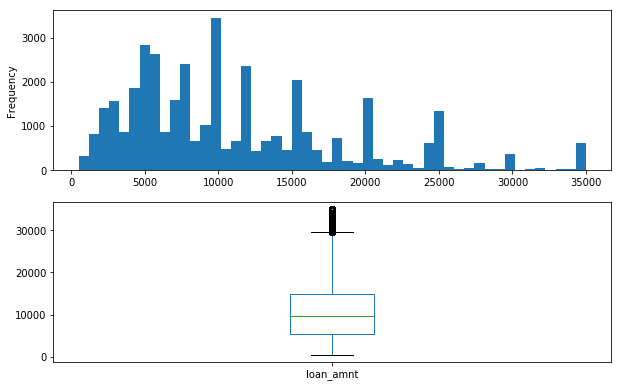

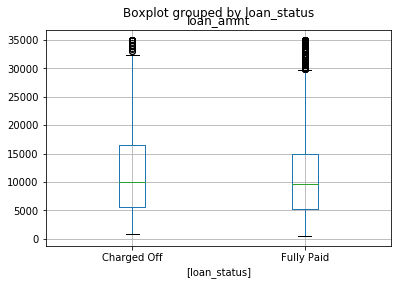

In [60]:
do_analysis(lending_club, 'loan_amnt')

## Insight.
The loan amount has spikes at the round numbers like 5, 000$, 10,000 $, 15, 000$, 20, 000$ 25, 000 $ etc. <br/>
This can be an input to the UX team or the Business Development team to create loan packages at these round numbers.

In [61]:
run_t_test(lending_club, 'loan_amnt')

Ttest_indResult(statistic=11.699464641997436, pvalue=1.4503293564089715e-31)


## Insight.
Visually, there seems to be a slightdifference in the means of the loan amount for charged off and fully paid. <br/>
However, T Test indicates that loan amount has a bearing on the loan defaults

# Data Cleanup for loan_amnt

## Data Cleanup:  We will not remove any row for loan_amnt as all the rows seem valid.

# Insights for loan_amnt

In [62]:
lending_club[['annual_inc', 'loan_amnt']].corr()

,annual_inc,loan_amnt
annual_inc,1.000000,0.268999
loan_amnt,0.268999,1.000000


## Insight 
The Loan amount is corelated positively with the annual income

# Data Analysis for funded_amnt

In [63]:
# Is funded_amnt same as loan amnt. 
#What % of rows where funded amount and loan amount are not same.
percent_difference = lending_club.loc[lending_club['loan_amnt'] != lending_club['funded_amnt']]['funded_amnt'].shape[0]/ lending_club.shape[0]
print("% .2f" % (percent_difference * 100))

 4.55


In [64]:
# Is the monetary difference more. yes
(lending_club['loan_amnt'] - lending_club['funded_amnt']).sum()

10144475

count    38577.000000
mean     10784.058506
std       7090.306027
min        500.000000
0%         500.000000
10%       3000.000000
20%       5000.000000
30.0%     6000.000000
40%       7500.000000
50%       9550.000000
60.0%    10875.000000
70%      13000.000000
80%      16000.000000
90%      20000.000000
100%     35000.000000
max      35000.000000
Name: funded_amnt, dtype: float64
Number of null values for the column funded_amnt : 0


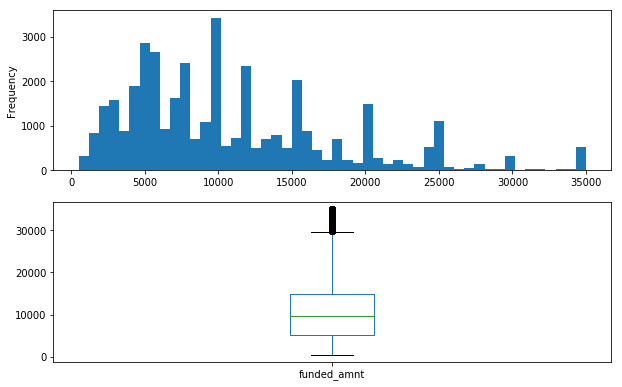

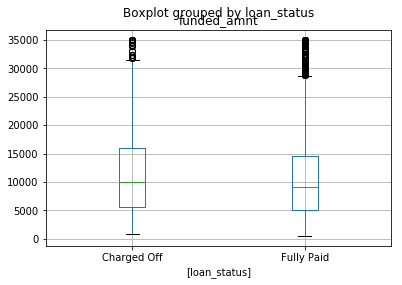

In [65]:
do_analysis(lending_club, 'funded_amnt')

# Insight
Charged off has a higher average funded amount than the fully paid segment <br>
Also, since the loan_amount and funded_amount are highly corelated, and there is not a lot a difference, we can just use the funded_amount column and drop the loan amount column.

# Data Cleanup for funded_amnt

# Insights for funded_amnt

In [66]:
# corelation between loan amount and funded amount
lending_club[['loan_amnt', 'funded_amnt']].corr()

,loan_amnt,funded_amnt
loan_amnt,1.00000,0.98179
funded_amnt,0.98179,1.00000


# Data Analysis for funded_amnt_inv

# Data Cleanup for funded_amnt_inv

# Insights for funded_amnt_inv

# Data Analysis for term

In [67]:
lending_club['term'].value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

 36 months    29096
 60 months     9481
Name: term, dtype: int64
loan_status  Charged Off  Fully Paid    All
term                                       
 36 months          3227       25869  29096
 60 months          2400        7081   9481
All                 5627       32950  38577


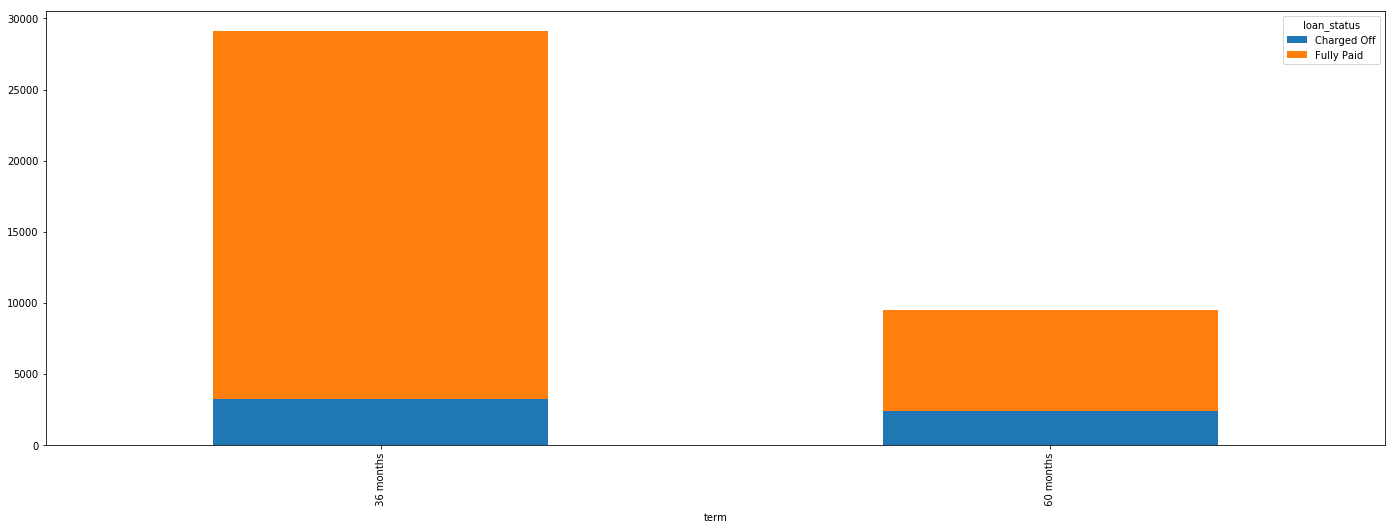

In [68]:
do_analysis_categorical(lending_club, 'term')

## Insight : term
11% of customers with tenure of 36 months default <br>
25.42 % of the customers with tenure of 60 months default <br>
Higher tenure leads to higher default rates.

# Data Cleanup for term

# Insights for term

# Data Analysis for int_rate

# Data Cleanup for int_rate

# Insights for int_rate

# Data Analysis for installment

# Data Cleanup for installment

# Insights for installment

# Data Analysis for grade

# Data Cleanup for grade

# Insights for grade

# Data Analysis for sub_grade

# Data Cleanup for sub_grade

# Insights for sub_grade

# Data Analysis for emp_title

# Data Cleanup for emp_title

# Insights for emp_title

# Data Analysis for emp_length

# Data Cleanup for emp_length

# Insights for emp_length

# Data Analysis for home_ownership

# Data Cleanup for home_ownership

# Insights for home_ownership

# Data Analysis for annual_inc

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
0%       4.000000e+03
10%      3.000000e+04
20%      3.719616e+04
30.0%    4.450000e+04
40%      5.000400e+04
50%      5.886800e+04
60.0%    6.500400e+04
70%      7.500000e+04
80%      9.000000e+04
90%      1.150000e+05
100%     6.000000e+06
max      6.000000e+06
Name: annual_inc, dtype: float64
Number of null values for the column annual_inc : 0


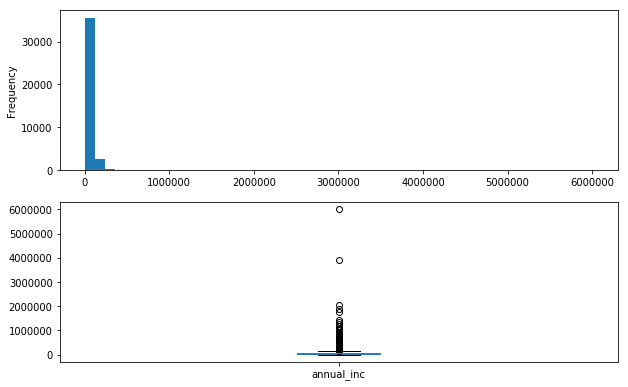

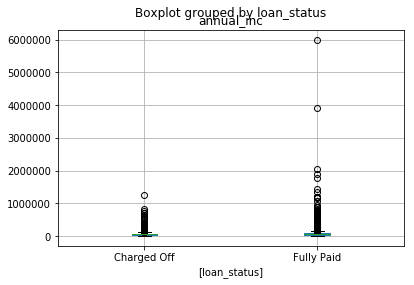

In [69]:
do_analysis(lending_club, 'annual_inc')

# Data Cleanup for annual_inc

In [70]:
# 5th percentile
lending_club.annual_inc.quantile(0.05)

24000.0

In [71]:
#What percent of values fall below the 5th percentile?
percent = lending_club.loc[lending_club['annual_inc'] < 24000].shape[0] * 100 / lending_club.shape[0]
print("% .2f" % percent)

 4.63


In [72]:
# 95th percentile
lending_club.annual_inc.quantile(0.99)

234143.99999999878

In [73]:
# Percentage of values that fall in above the 99th percentile (i.e top 1 percentile)
percent = lending_club.loc[lending_club['annual_inc'] > 234999].shape[0] * 100/ lending_club.shape[0]
print("% .2f" % percent)

 1.00


In [74]:
lending_club['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

The spread is between around 40,000 and 82,300. We will drop the outliers top 99 percentile. We will not remove the bottom 5 percentile because the lenders can be from the low income group. Also below the 5th percentile, there are 5% of rows. so we will not remove the bottom 5th percentile.

In [75]:
# Removing the top 1 percentile of outliers
lending_club = lending_club.loc[lending_club['annual_inc'] < 234999]

# Insights for annual_inc

# Data Analysis for verification_status

# Data Cleanup for verification_status

# Insights for verification_status

# Data Analysis for issue_d

# Data Cleanup for issue_d

# Insights for issue_d

# Data Analysis for loan_status

# Data Cleanup for loan_status

# Insights for loan_status

# Data Analysis for pymnt_plan

# Data Cleanup for pymnt_plan

# Insights for pymnt_plan

# Data Analysis for url

# Data Cleanup for url

# Insights for url

# Data Analysis for desc

# Data Cleanup for desc

# Insights for desc

# Data Analysis for purpose

# Data Cleanup for purpose

# Insights for purpose

# Data Analysis for title

# Data Cleanup for title

# Insights for title

# Data Analysis for zip_code

# Data Cleanup for zip_code

# Insights for zip_code

# Data Analysis for addr_state

# Data Cleanup for addr_state

# Insights for addr_state

# Data Analysis for dti

# Data Cleanup for dti

# Insights for dti

# Data Analysis for delinq_2yrs

# Data Cleanup for delinq_2yrs

# Insights for delinq_2yrs

# Data Analysis for earliest_cr_line

# Data Cleanup for earliest_cr_line

# Insights for earliest_cr_line

# Data Analysis for inq_last_6mths

# Data Cleanup for inq_last_6mths

# Insights for inq_last_6mths

# Data Analysis for mths_since_last_delinq

# Data Cleanup for mths_since_last_delinq

# Insights for mths_since_last_delinq

# Data Analysis for mths_since_last_record

# Data Cleanup for mths_since_last_record

# Insights for mths_since_last_record

# Data Analysis for open_acc

# Data Cleanup for open_acc

# Insights for open_acc

# Data Analysis for pub_rec

# Data Cleanup for pub_rec

# Insights for pub_rec

# Data Analysis for revol_bal

# Data Cleanup for revol_bal

# Insights for revol_bal

# Data Analysis for revol_util

# Data Cleanup for revol_util

# Insights for revol_util

# Data Analysis for total_acc

# Data Cleanup for total_acc

# Insights for total_acc

# Data Analysis for initial_list_status

# Data Cleanup for initial_list_status

# Insights for initial_list_status

# Data Analysis for out_prncp

# Data Cleanup for out_prncp

# Insights for out_prncp

# Data Analysis for out_prncp_inv

# Data Cleanup for out_prncp_inv

# Insights for out_prncp_inv

# Data Analysis for total_pymnt

# Data Cleanup for total_pymnt

# Insights for total_pymnt

# Data Analysis for total_pymnt_inv

# Data Cleanup for total_pymnt_inv

# Insights for total_pymnt_inv

# Data Analysis for total_rec_prncp

# Data Cleanup for total_rec_prncp

# Insights for total_rec_prncp

# Data Analysis for total_rec_int

# Data Cleanup for total_rec_int

# Insights for total_rec_int

# Data Analysis for total_rec_late_fee

# Data Cleanup for total_rec_late_fee

# Insights for total_rec_late_fee

# Data Analysis for recoveries

# Data Cleanup for recoveries

# Insights for recoveries

# Data Analysis for collection_recovery_fee

# Data Cleanup for collection_recovery_fee

# Insights for collection_recovery_fee

# Data Analysis for last_pymnt_d

# Data Cleanup for last_pymnt_d

# Insights for last_pymnt_d

# Data Analysis for last_pymnt_amnt

# Data Cleanup for last_pymnt_amnt

# Insights for last_pymnt_amnt

# Data Analysis for next_pymnt_d

# Data Cleanup for next_pymnt_d

# Insights for next_pymnt_d

# Data Analysis for last_credit_pull_d

# Data Cleanup for last_credit_pull_d

# Insights for last_credit_pull_d

# Data Analysis for collections_12_mths_ex_med

# Data Cleanup for collections_12_mths_ex_med

# Insights for collections_12_mths_ex_med

# Data Analysis for mths_since_last_major_derog

# Data Cleanup for mths_since_last_major_derog

# Insights for mths_since_last_major_derog

# Data Analysis for policy_code

# Data Cleanup for policy_code

# Insights for policy_code

# Data Analysis for application_type

# Data Cleanup for application_type

# Insights for application_type

# Data Analysis for annual_inc_joint

# Data Cleanup for annual_inc_joint

# Insights for annual_inc_joint

# Data Analysis for dti_joint

# Data Cleanup for dti_joint

# Insights for dti_joint

# Data Analysis for verification_status_joint

# Data Cleanup for verification_status_joint

# Insights for verification_status_joint

# Data Analysis for acc_now_delinq

# Data Cleanup for acc_now_delinq

# Insights for acc_now_delinq

# Data Analysis for tot_coll_amt

# Data Cleanup for tot_coll_amt

# Insights for tot_coll_amt

# Data Analysis for tot_cur_bal

# Data Cleanup for tot_cur_bal

# Insights for tot_cur_bal

# Data Analysis for open_acc_6m

# Data Cleanup for open_acc_6m

# Insights for open_acc_6m

# Data Analysis for open_il_6m

# Data Cleanup for open_il_6m

# Insights for open_il_6m

# Data Analysis for open_il_12m

# Data Cleanup for open_il_12m

# Insights for open_il_12m

# Data Analysis for open_il_24m

# Data Cleanup for open_il_24m

# Insights for open_il_24m

# Data Analysis for mths_since_rcnt_il

# Data Cleanup for mths_since_rcnt_il

# Insights for mths_since_rcnt_il

# Data Analysis for total_bal_il

# Data Cleanup for total_bal_il

# Insights for total_bal_il

# Data Analysis for il_util

# Data Cleanup for il_util

# Insights for il_util

# Data Analysis for open_rv_12m

# Data Cleanup for open_rv_12m

# Insights for open_rv_12m

# Data Analysis for open_rv_24m

# Data Cleanup for open_rv_24m

# Insights for open_rv_24m

# Data Analysis for max_bal_bc

# Data Cleanup for max_bal_bc

# Insights for max_bal_bc

# Data Analysis for all_util

# Data Cleanup for all_util

# Insights for all_util

# Data Analysis for total_rev_hi_lim

# Data Cleanup for total_rev_hi_lim

# Insights for total_rev_hi_lim

# Data Analysis for inq_fi

# Data Cleanup for inq_fi

# Insights for inq_fi

# Data Analysis for total_cu_tl

# Data Cleanup for total_cu_tl

# Insights for total_cu_tl

# Data Analysis for inq_last_12m

# Data Cleanup for inq_last_12m

# Insights for inq_last_12m

# Data Analysis for acc_open_past_24mths

# Data Cleanup for acc_open_past_24mths

# Insights for acc_open_past_24mths

# Data Analysis for avg_cur_bal

# Data Cleanup for avg_cur_bal

# Insights for avg_cur_bal

# Data Analysis for bc_open_to_buy

# Data Cleanup for bc_open_to_buy

# Insights for bc_open_to_buy

# Data Analysis for bc_util

# Data Cleanup for bc_util

# Insights for bc_util

# Data Analysis for chargeoff_within_12_mths

# Data Cleanup for chargeoff_within_12_mths

# Insights for chargeoff_within_12_mths

# Data Analysis for delinq_amnt

# Data Cleanup for delinq_amnt

# Insights for delinq_amnt

# Data Analysis for mo_sin_old_il_acct

# Data Cleanup for mo_sin_old_il_acct

# Insights for mo_sin_old_il_acct

# Data Analysis for mo_sin_old_rev_tl_op

# Data Cleanup for mo_sin_old_rev_tl_op

# Insights for mo_sin_old_rev_tl_op

# Data Analysis for mo_sin_rcnt_rev_tl_op

# Data Cleanup for mo_sin_rcnt_rev_tl_op

# Insights for mo_sin_rcnt_rev_tl_op

# Data Analysis for mo_sin_rcnt_tl

# Data Cleanup for mo_sin_rcnt_tl

# Insights for mo_sin_rcnt_tl

# Data Analysis for mort_acc

# Data Cleanup for mort_acc

# Insights for mort_acc

# Data Analysis for mths_since_recent_bc

# Data Cleanup for mths_since_recent_bc

# Insights for mths_since_recent_bc

# Data Analysis for mths_since_recent_bc_dlq

# Data Cleanup for mths_since_recent_bc_dlq

# Insights for mths_since_recent_bc_dlq

# Data Analysis for mths_since_recent_inq

# Data Cleanup for mths_since_recent_inq

# Insights for mths_since_recent_inq

# Data Analysis for mths_since_recent_revol_delinq

# Data Cleanup for mths_since_recent_revol_delinq

# Insights for mths_since_recent_revol_delinq

# Data Analysis for num_accts_ever_120_pd

# Data Cleanup for num_accts_ever_120_pd

# Insights for num_accts_ever_120_pd

# Data Analysis for num_actv_bc_tl

# Data Cleanup for num_actv_bc_tl

# Insights for num_actv_bc_tl

# Data Analysis for num_actv_rev_tl

# Data Cleanup for num_actv_rev_tl

# Insights for num_actv_rev_tl

# Data Analysis for num_bc_sats

# Data Cleanup for num_bc_sats

# Insights for num_bc_sats

# Data Analysis for num_bc_tl

# Data Cleanup for num_bc_tl

# Insights for num_bc_tl

# Data Analysis for num_il_tl

# Data Cleanup for num_il_tl

# Insights for num_il_tl

# Data Analysis for num_op_rev_tl

# Data Cleanup for num_op_rev_tl

# Insights for num_op_rev_tl

# Data Analysis for num_rev_accts

# Data Cleanup for num_rev_accts

# Insights for num_rev_accts

# Data Analysis for num_rev_tl_bal_gt_0

# Data Cleanup for num_rev_tl_bal_gt_0

# Insights for num_rev_tl_bal_gt_0

# Data Analysis for num_sats

# Data Cleanup for num_sats

# Insights for num_sats

# Data Analysis for num_tl_120dpd_2m

# Data Cleanup for num_tl_120dpd_2m

# Insights for num_tl_120dpd_2m

# Data Analysis for num_tl_30dpd

# Data Cleanup for num_tl_30dpd

# Insights for num_tl_30dpd

# Data Analysis for num_tl_90g_dpd_24m

# Data Cleanup for num_tl_90g_dpd_24m

# Insights for num_tl_90g_dpd_24m

# Data Analysis for num_tl_op_past_12m

# Data Cleanup for num_tl_op_past_12m

# Insights for num_tl_op_past_12m

# Data Analysis for pct_tl_nvr_dlq

# Data Cleanup for pct_tl_nvr_dlq

# Insights for pct_tl_nvr_dlq

# Data Analysis for percent_bc_gt_75

# Data Cleanup for percent_bc_gt_75

# Insights for percent_bc_gt_75

# Data Analysis for pub_rec_bankruptcies

# Data Cleanup for pub_rec_bankruptcies

# Insights for pub_rec_bankruptcies

# Data Analysis for tax_liens

# Data Cleanup for tax_liens

# Insights for tax_liens

# Data Analysis for tot_hi_cred_lim

# Data Cleanup for tot_hi_cred_lim

# Insights for tot_hi_cred_lim

# Data Analysis for total_bal_ex_mort

# Data Cleanup for total_bal_ex_mort

# Insights for total_bal_ex_mort

# Data Analysis for total_bc_limit

# Data Cleanup for total_bc_limit

# Insights for total_bc_limit

# Data Analysis for total_il_high_credit_limit

# Data Cleanup for total_il_high_credit_limit

# Insights for total_il_high_credit_limit

# ----------------- SECTION 2 ------------------------
# ----------------- DERIVED COLUMNS -------------

## 1) Income Level

In [76]:
# Creating a function to segment customers based on their income levels
# LOW is less than 30, 000, MID is between 30,000 and 90, 000, HIGH is above 90, 000

def get_income_segment(income):
    if(income < 30000):
        return 'LOW'
    if((income >= 30000) & (income < 90000)):
        return 'MID'
    if(income >= 90000):
        return 'HIGH'

In [77]:
#Segment the customers by income level
lending_club['income_level'] = lending_club.apply(lambda row : get_income_segment(row['annual_inc']), axis=1)

In [78]:
# Segmented Univariate Analysis
pd.pivot_table(lending_club, values = 'policy_code', index = ['income_level'], columns = ['loan_status'], aggfunc = np.sum)

loan_status,Charged Off,Fully Paid
income_level,,
HIGH,841,6808
LOW,700,3043
MID,4043,22758


array([<matplotlib.axes._subplots.AxesSubplot object at 0x10efc5c18>,
      dtype=object)

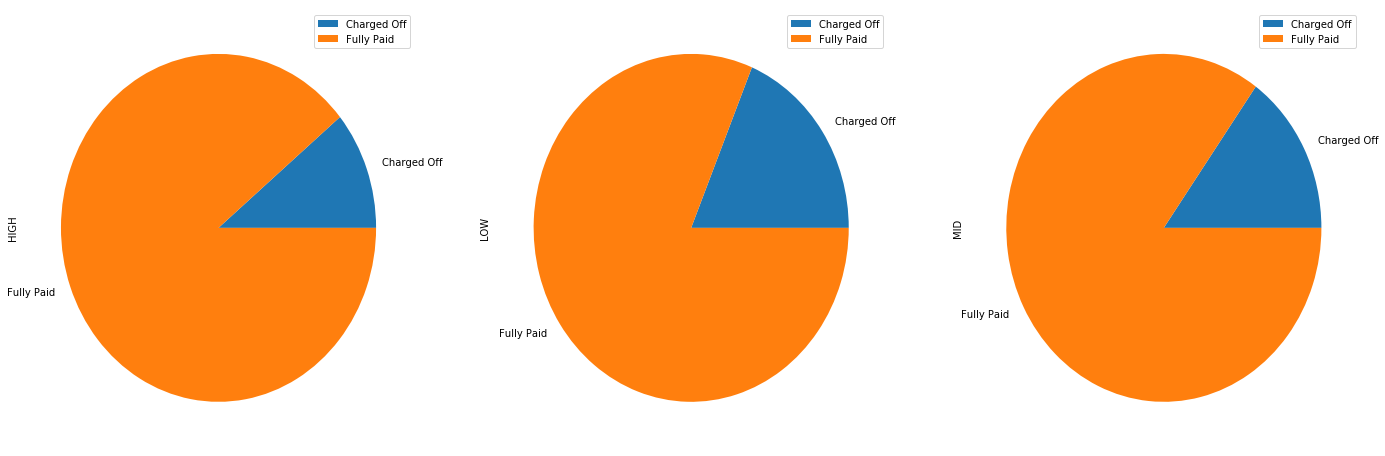

In [79]:
# Segmented Univariate Analysis
pd.pivot_table(lending_club, values = 'policy_code', index = ['loan_status'], columns = ['income_level'], aggfunc = np.sum).plot(kind='pie', subplots=True, figsize=(24, 8))

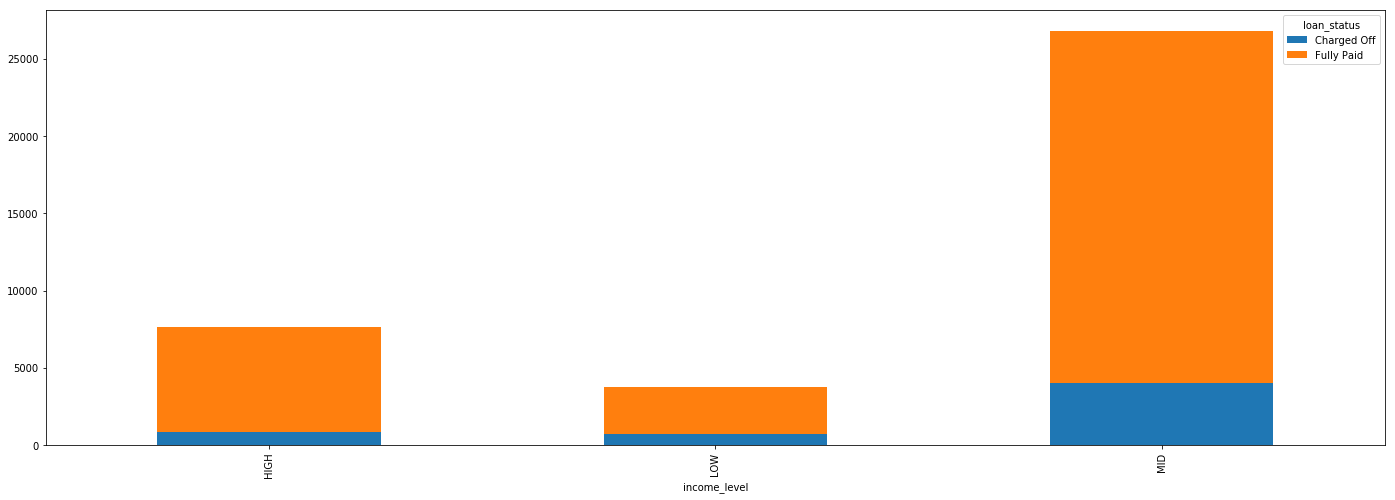

In [80]:
# Segmented Univariate Analysis. todo create barcharts so that all bars are of same height
pd.pivot_table(lending_club, values = 'policy_code', index = ['income_level'], columns = ['loan_status'], aggfunc = np.sum).plot(kind='bar', stacked=True, figsize=(24, 8))

## INSIGHT : This pivot table gives the percentage of charged off (defaults) in each income segment.
10% : HIGH Income segment have 841/(6808 + 218 + 841) <br/>
14% : MID Income Segment have 4043 / (4043 + 789 + 22758)<br/>
18% : LOW Income Segment has 700 / (700 + 56 + 3043)<br/>

### This shows that the Loan default increases in the lower income segment.

### What is the distribution of loan amount in the lower income segment when customer defaults

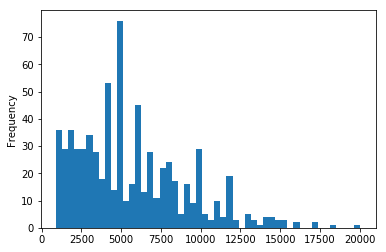

In [81]:
lending_club.loc[(lending_club['income_level'] == 'LOW') & (lending_club['loan_status'] == 'Charged Off')]['loan_amnt'].plot(kind='hist', bins=50)

## 2) Loan Amount Funded Amount difference

In [82]:
# I also want to analyse if the people who ask more, but get less. 
# Is there is corelation between this difference and chargeoff

lending_club['asking_lending_difference'] = lending_club['loan_amnt'] - lending_club['funded_amnt']

count    38193.000000
mean       259.101144
std       1385.241122
min          0.000000
0%           0.000000
10%          0.000000
20%          0.000000
30.0%        0.000000
40%          0.000000
50%          0.000000
60.0%        0.000000
70%          0.000000
80%          0.000000
90%          0.000000
100%     21025.000000
max      21025.000000
Name: asking_lending_difference, dtype: float64
Number of null values for the column asking_lending_difference : 0


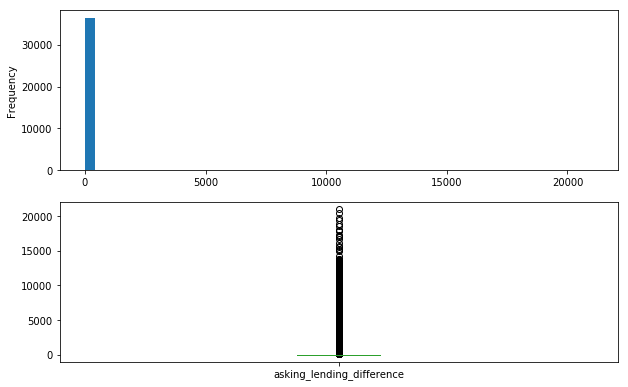

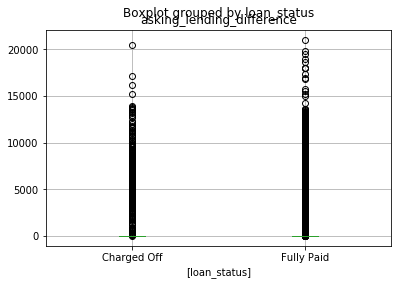

In [83]:
do_analysis(lending_club, 'asking_lending_difference')

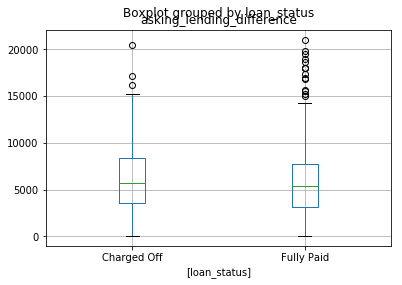

In [84]:
# Where asking_lending_difference is greater than 0
lending_club[['asking_lending_difference', 'loan_status']].loc[lending_club['asking_lending_difference'] > 0].boxplot(by='loan_status')

# Insight
The charged off loans had asked for a higher amount but got lower loan amount.

In [85]:
run_t_test(lending_club, 'asking_lending_difference')

Ttest_indResult(statistic=5.114496202666268, pvalue=3.160975823764295e-07)


# ----------- SECTION 3 ------------
# ----------- Bi Variate Analysis ------------

## 1) Multivariate analysis using a dendrogram

In [86]:
corr = lending_club[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 
                     'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
                    'total_rec_int', 'annual_inc', 'revol_bal','last_pymnt_amnt',
                     'total_rec_late_fee', 'recoveries', 'collection_recovery_fee','dti']].corr()

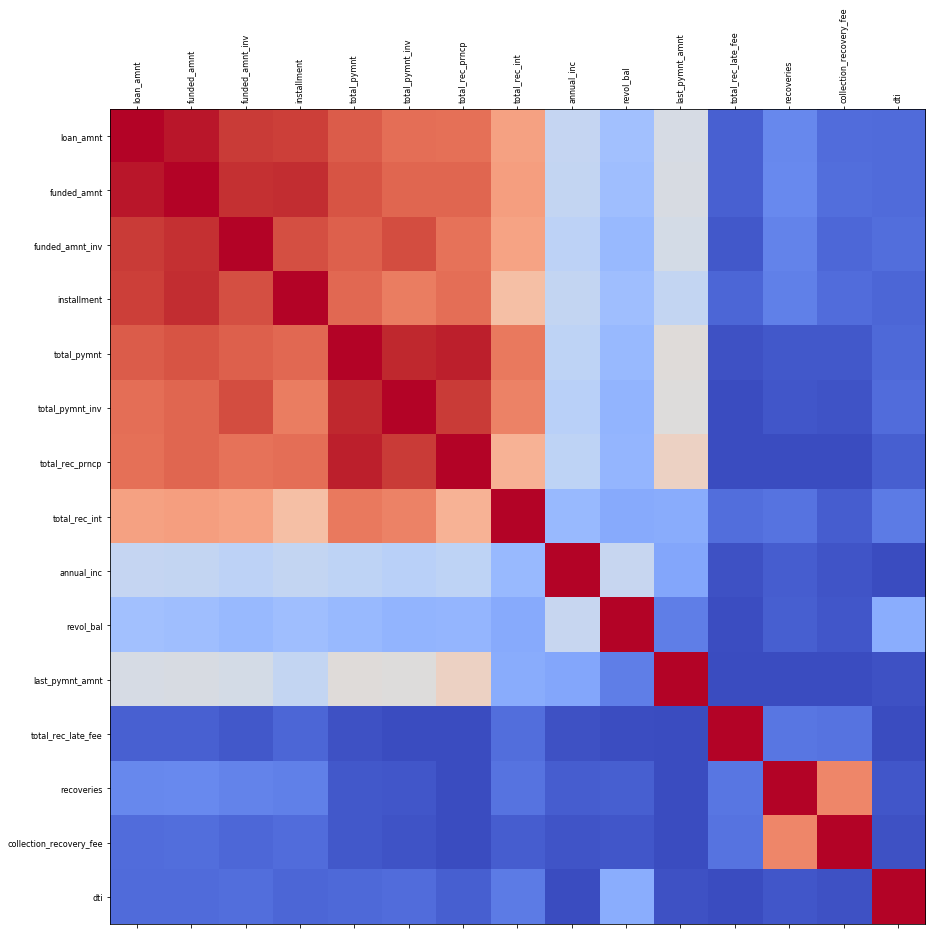

In [87]:
fig, ax = plt.subplots(figsize=(15,15))
ax.matshow(corr, cmap=cm.get_cmap('coolwarm'), vmin=0, vmax=1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical', fontsize=8);
plt.yticks(range(len(corr.columns)), corr.columns, fontsize=8);


In [88]:
Z = linkage(corr, 'average')

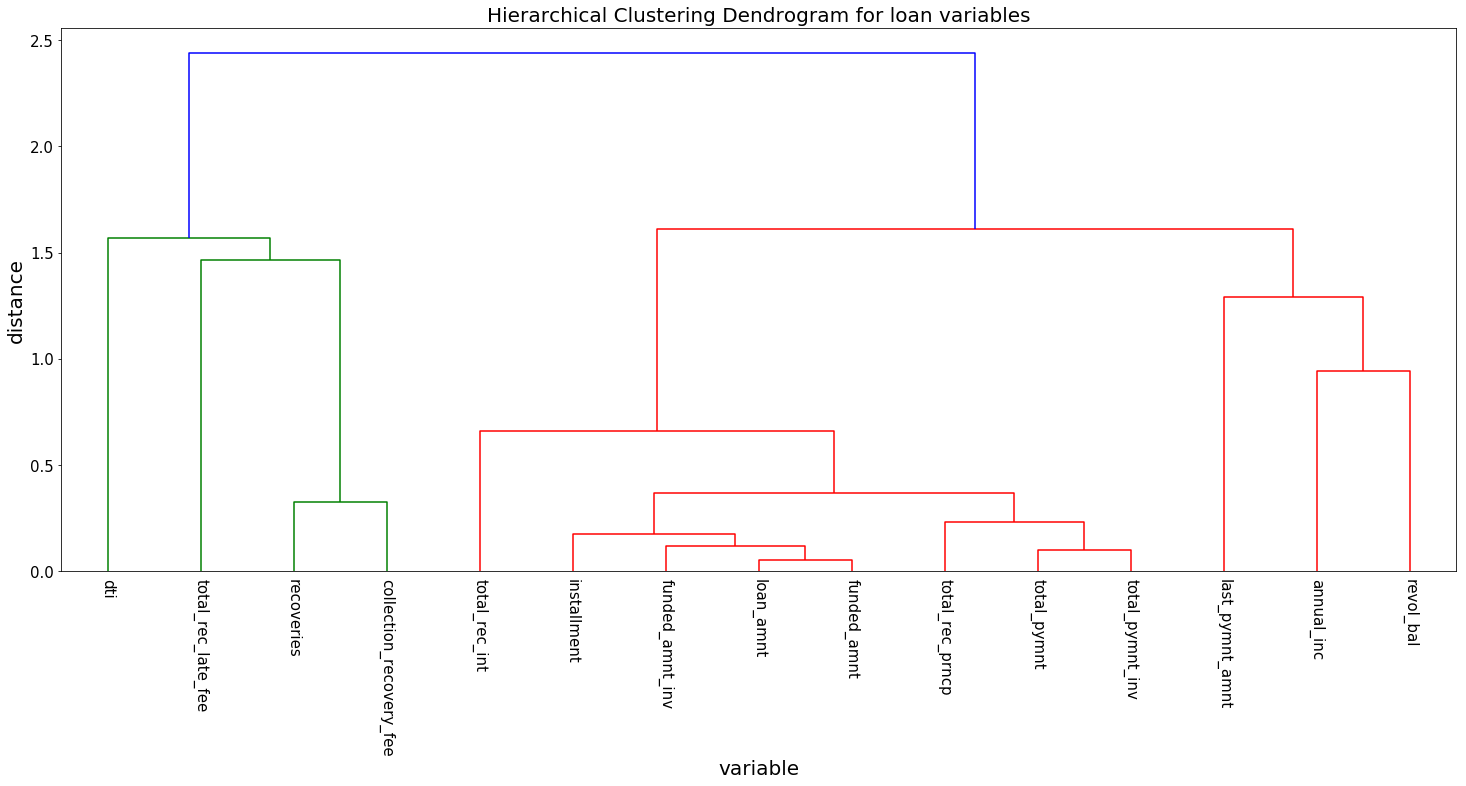

In [89]:
plt.figure(figsize=(25, 10))
labelsize=20
ticksize=15
plt.title('Hierarchical Clustering Dendrogram for loan variables', fontsize=labelsize)
plt.xlabel('variable', fontsize=labelsize)
plt.ylabel('distance', fontsize=labelsize)
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    labels = corr.columns
)
pylab.yticks(fontsize=ticksize)
pylab.xticks(rotation=-90, fontsize=ticksize)
#plt.savefig('img/dendogram_'+index+'.png')
plt.show()

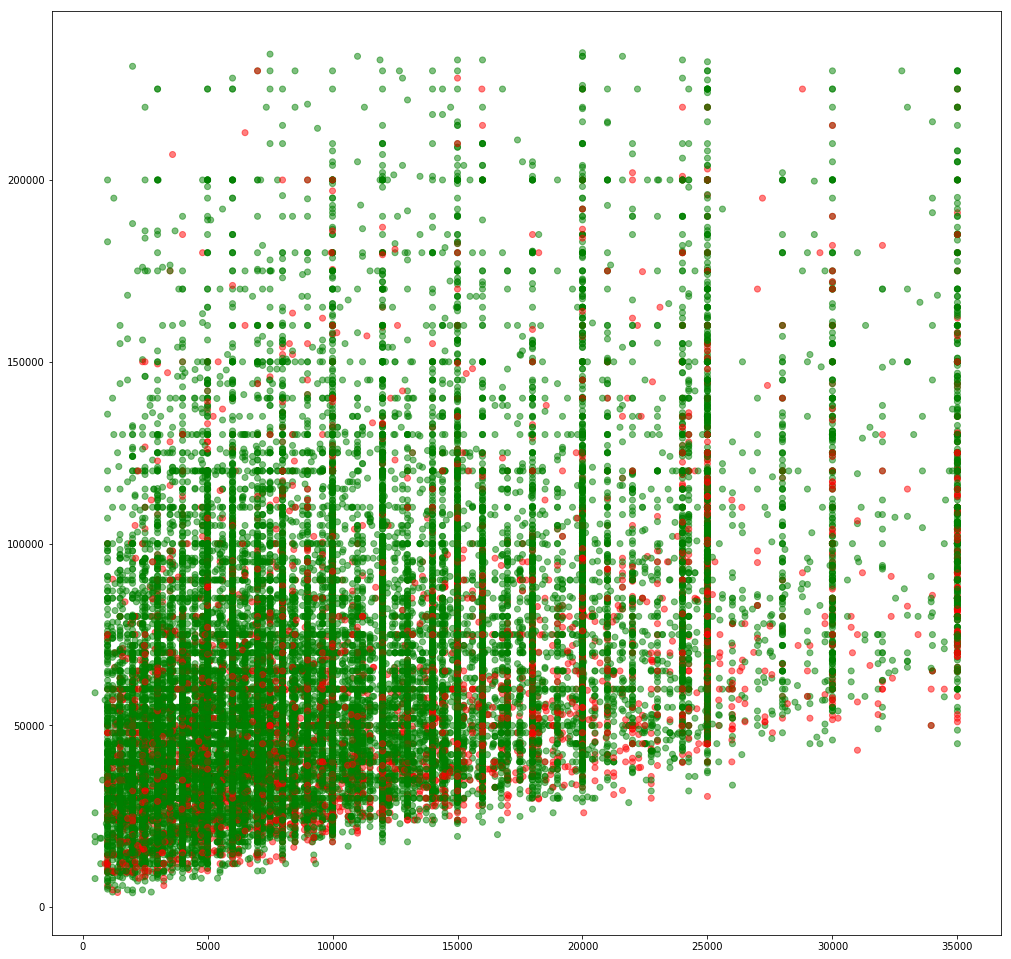

In [90]:

fig, ax = plt.subplots(figsize=(17,17))

colours = {'Fully Paid':'green', 'Charged Off':'red', 'Current':'blue'}
ax.scatter(lending_club['loan_amnt'], lending_club['annual_inc'], c=lending_club['loan_status'].apply(lambda x: colours[x]), alpha=0.5)

## Insight
Plot to see if there is a co-relation between the loan amount and annual income, and see if there are any clusters <br>
 of defaults. We see that the loan amount is co-related to annual income, however there is no pattern or clusters of <br>
defaults <br>
At lower income levels - below 10000 USD and higher loan amounts - above 15, 000 USD, there seems to be a concentration of defaults.

## Logistic Regression for Stastical Inference

In [106]:
def convert_loan_status_to_binary(loan_status):
    if(loan_status == 'Charged Off'):
        return 1;
    if(loan_status == 'Fully Paid'):
        return 0
    
lending_club['loan_status_binary'] = lending_club['loan_status'].apply(lambda x:convert_loan_status_to_binary(x))


In [109]:
lreg = smf.logit(formula ='loan_status_binary ~ annual_inc + loan_amnt +C(income_level)', data = lending_club).fit()

Optimization terminated successfully.
         Current function value: 0.408725
         Iterations 6


In [110]:
print(lreg.summary())

                           Logit Regression Results                           
Dep. Variable:     loan_status_binary   No. Observations:                38193
Model:                          Logit   Df Residuals:                    38188
Method:                           MLE   Df Model:                            4
Date:                Tue, 24 Jul 2018   Pseudo R-squ.:                 0.01765
Time:                        00:27:07   Log-Likelihood:                -15610.
converged:                       True   LL-Null:                       -15891.
                                        LLR p-value:                4.226e-120
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1.7116      0.106    -16.109      0.000      -1.920      -1.503
C(income_level)[T.LOW]     0.2114      0.098      2.162      0.031       0.020       0.403
C(in

In [111]:
print("odds ratios of each variable")
print(np.exp(lreg.params))

odds ratios of each variable
Intercept                 0.180577
C(income_level)[T.LOW]    1.235444
C(income_level)[T.MID]    1.015620
annual_inc                0.999991
loan_amnt                 1.000043
dtype: float64


In [115]:
print("lower and upper confidence intervals")
print(lreg.conf_int())

lower and upper confidence intervals
                               0         1
Intercept              -1.919846 -1.503351
C(income_level)[T.LOW]  0.019735  0.403127
C(income_level)[T.MID] -0.114774  0.145772
annual_inc             -0.000011 -0.000007
loan_amnt               0.000039  0.000047
